## Variable star period search and light curve fitting

In [1]:
import matplotlib.pyplot as mp
%matplotlib inline
import lcv_fitting
import numpy as np

### Read in star data

In [2]:
filters, data = lcv_fitting.read_lcv('V2.lcv')

# subarrays with single filter
V_band = data[data['filter'] == 'V']
B_band = data[data['filter'] == 'B']
R_band = data[data['filter'] == 'R']
I1_band = data[data['filter'] == 'I1']

### Do Lomb-Scargle to get first guess of period

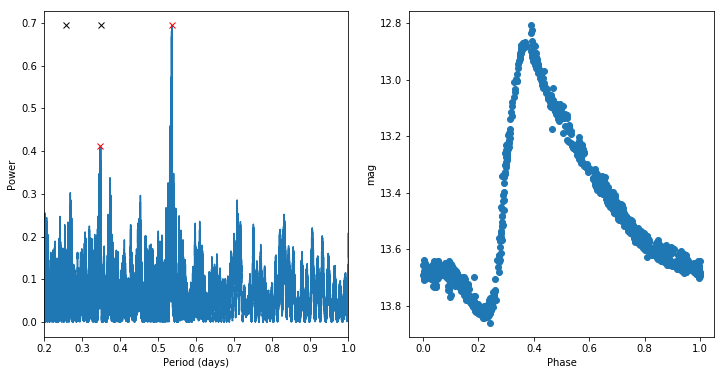

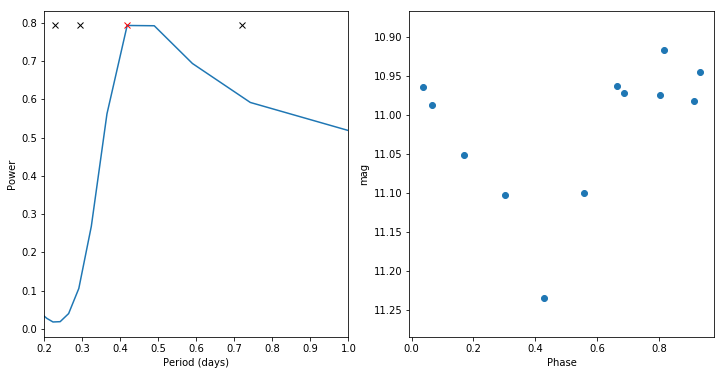

In [3]:
# Bands with the largest amount of data will work 
# Currently optimized for RR Lyrae stars, but you should be able to make it work for AGB by setting 
# min_period and max_period when calling period_search

guess_period, snr = lcv_fitting.period_search(V_band, 'V2')

# Lomb-Scargle will not work for bands with too few epochs
junk_period, junk_snr = lcv_fitting.period_search(I1_band, 'V2', error_threshold=0.1)


### Refine the period by minimizing the dispersion in the phased light curve

In [4]:
# You can do this process with a single, or two bands 
period = lcv_fitting.refine_period(V_band, guess_period, second_band=B_band, search_window=0.0005)
print period

0.5356817


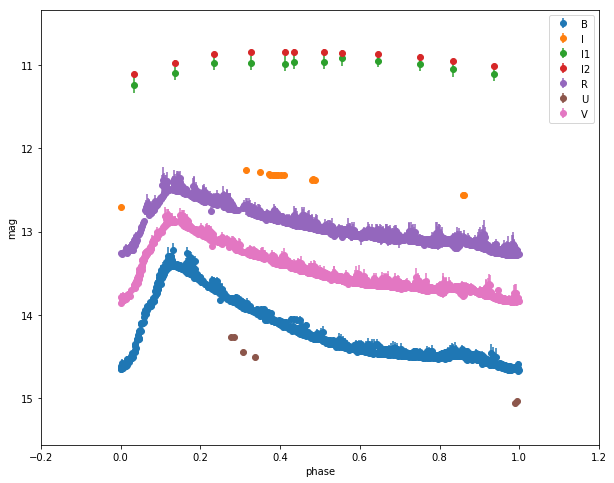

In [5]:
#check the phased light curves
lcv_fitting.phase_lcv(filters, data, 'V2', period, plot=1)

### Fit the light curves using GLOESS

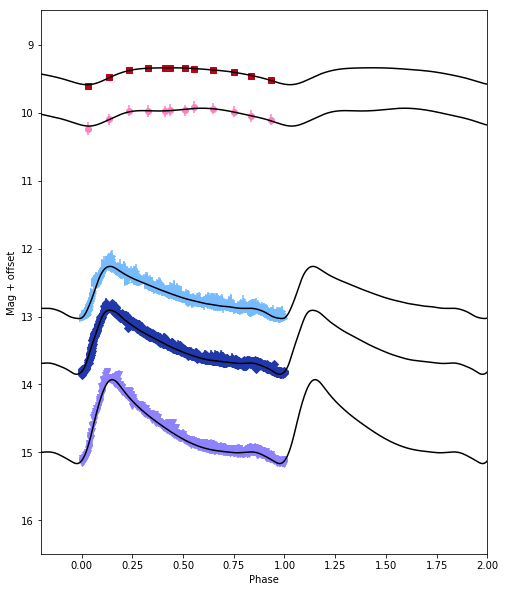

In [11]:
# GLOESS can either try to automatically determine the appropriate smoothing parameter, or you can choose
# them manually. To choose it yourself, either set them with smoothing_params=some_array or set ask=1 for an 
# interactive method

# This program will automatically skip any filters that have too sparse phase coverage (i.e. the U and I bands in 
# this example)

# The average magnitue, error, amplitude, and error in the amplitude are returned for each filter
filters, avg_mag, avg_mag_err, amplitude, amplitude_err = lcv_fitting.gloess('V2.ph', ask=0, master_plot=1)

In [7]:
print '    mag   err  amp  err'
for num, filt in enumerate(filters):
    if avg_mag[num] != 0:
        print '{:2s}: {:5.2f} {:4.2f} {:4.2f} {:4.2f} '.format(filt, avg_mag[num], avg_mag_err[num], 
                                                        amplitude[num], amplitude_err[num])


    mag   err  amp  err
B : 14.14 0.01 1.23 0.08 
V : 13.43 0.01 0.94 0.08 
R : 12.93 0.01 0.76 0.08 
I1: 11.02 0.03 0.26 0.17 
I2: 10.92 0.02 0.25 0.17 
